In [61]:
#importing the Libraies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
# Reading the Dataset
dataset = pd.read_csv('Social_Network_Ads.csv')

In [63]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [64]:
dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [65]:
dataset=pd.get_dummies(dataset,dtype=int,drop_first=True)

In [100]:
dataset

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [67]:
indep=dataset[['Age', 'EstimatedSalary','Gender_Male']]
dep=dataset['Purchased']

In [68]:
#split into training set and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(indep, dep, test_size = 1/3, random_state = 0)

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [70]:
from sklearn.svm import SVC

In [11]:
#https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [71]:
from sklearn.model_selection import GridSearchCV

param_grid = {'kernel':['linear','rbf','poly','sigmoid'],
             'gamma':['auto','scale'],
             'C':[10,100,1000,2000,3000]} 


grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3,n_jobs=-1,scoring='f1_weighted') 
   
# fitting the model for grid search 
grid.fit(X_train, y_train) 
 

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [10, 100, 1000, 2000, 3000],
                         'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='f1_weighted', verbose=3)

In [99]:
# print best parameter after tuning 
#print(grid.best_params_) 
re=grid.cv_results_
#print(re)
grid_predictions = grid.predict(X_test) 
   

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, grid_predictions)


# print classification report 
from sklearn.metrics import classification_report
clf_report = classification_report(y_test, grid_predictions)

In [76]:

from sklearn.metrics import f1_score
f1_macro=f1_score(y_test,grid_predictions,average='weighted')
print("The f1_macro value for best parameter {}:".format(grid.best_params_),f1_macro)


The f1_macro value for best parameter {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}: 0.9100355779243318


In [77]:
print("The confusion Matrix:\n",cm)

The confusion Matrix:
 [[80  5]
 [ 7 42]]


In [78]:
print("The report:\n",clf_report)

The report:
               precision    recall  f1-score   support

           0       0.92      0.94      0.93        85
           1       0.89      0.86      0.88        49

    accuracy                           0.91       134
   macro avg       0.91      0.90      0.90       134
weighted avg       0.91      0.91      0.91       134



In [117]:
from sklearn.metrics import roc_auc_score

roc_score = roc_auc_score(y_test,grid.predict_proba(X_test)[:,1])
roc_score

0.9539015606242497

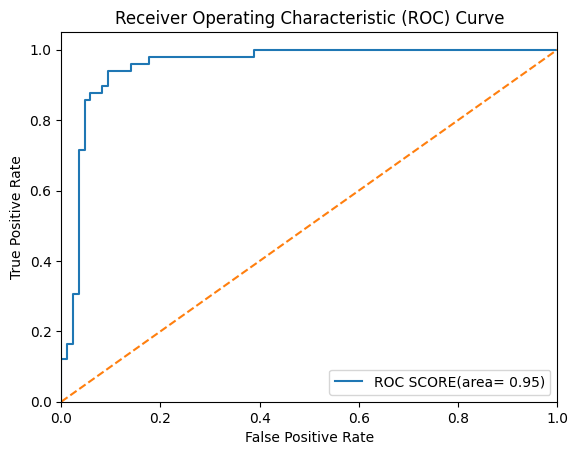

In [127]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
tpr,fpr,_ = roc_curve(y_test,grid.predict_proba(X_test)[:,1])
roc = auc(tpr,fpr)
plt.figure()
plt.plot(tpr,fpr, label = 'ROC SCORE(area= {:.2f})'.format(roc))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [81]:
table=pd.DataFrame.from_dict(re)

In [82]:
table

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009383,0.000449,0.117266,0.032955,10,auto,linear,"{'C': 10, 'gamma': 'auto', 'kernel': 'linear'}",0.776290,0.790949,0.698235,0.923510,0.901744,0.818146,0.083619,21
1,0.016971,0.009405,0.075680,0.057859,10,auto,rbf,"{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}",0.867478,0.886792,0.869709,0.944161,0.943041,0.902236,0.034431,3
2,0.019754,0.002200,0.005460,0.002107,10,auto,poly,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly'}",0.799620,0.808392,0.787943,0.924528,0.901744,0.844445,0.056918,11
3,0.012925,0.005371,0.006038,0.000933,10,auto,sigmoid,"{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid'}",0.762677,0.738916,0.655795,0.796284,0.766556,0.744045,0.047743,39
4,0.015026,0.003913,0.006067,0.000656,10,scale,linear,"{'C': 10, 'gamma': 'scale', 'kernel': 'linear'}",0.776290,0.790949,0.698235,0.923510,0.901744,0.818146,0.083619,21
5,0.009136,0.000572,0.004578,0.001557,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.867478,0.886792,0.869709,0.944161,0.943041,0.902236,0.034431,3
6,0.017410,0.007556,0.002669,0.002154,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.799620,0.808392,0.787943,0.924528,0.901744,0.844445,0.056918,11
7,0.009241,0.002005,0.003040,0.001784,10,scale,sigmoid,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid'}",0.762677,0.738916,0.753180,0.778067,0.766556,0.759879,0.013172,31
8,0.048046,0.009008,0.005125,0.003145,100,auto,linear,"{'C': 100, 'gamma': 'auto', 'kernel': 'linear'}",0.776290,0.790949,0.698235,0.923510,0.901744,0.818146,0.083619,21
9,0.014121,0.007022,0.006396,0.004057,100,auto,rbf,"{'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}",0.867478,0.886792,0.870362,0.944161,0.943041,0.902367,0.034308,1


In [105]:
age_input=int(input("Age:"))
Estimated_sal=int(input("EstimatedSalary:"))
Gender=int(input("Enter Gender Male 1 or Female 0:"))

Age: 1
EstimatedSalary: 23000
Enter Gender Male 1 or Female 0: 0


In [106]:
Future_Prediction=grid.predict([[age_input,Estimated_sal,Gender]])# change the paramter,play with it.
print("Future_Prediction={}".format(Future_Prediction))

Future_Prediction=[1]


In [110]:
grid.predict([[50,20000,0]])

array([1], dtype=int64)

In [109]:
grid_predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0], dtype=int64)